# Introduction <a name="1"></a>

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.
It took place from May 17, 2018 to August 29, 2018. For information on the winning entries, please see [here](https://www.kaggle.com/c/home-credit-default-risk/leaderboard/).

In this notebook, we follow a traditional data science project process to address the HCDR challenge of predicting fclients' repayment abilities using telco and transactional information.  

* We extract, transform, and load the data (**ETL**).
* Along the way, we do some exploratory data analysis (**EDA**).
* We conduct **feature engineering**.    
* We then **create models, evaluate their performance, and fine tune their parameters**.  
* We write up our **results**.  

To start you off, we will perform some basic visualization, feature engineering and preprocessing on the data provided.  Then, we build a baseline model using the mean of our training targets to predict our Days in the Hospital for our test set.  Finally, we will build a second model using Logostic regression over the following features to see if we can improve on our baseline model:

* numerical features
  * 
* Categorical features
  * 
* Target variable: indicating 0: the loan was repaid or 1: the loan was not repaid

## Introductory Phase:


### Major updates in the introductory phase.
* Downloaded the data
* ETL the data to generate training and test sets
* Some basic feature engineering
* Built a pipeline for feature engineering and for modeling
* Built a baseline model using logistic regression
* Started planning for phase 2

### Major plans for Phase 1
* Plan to engineering features
* Finetune hyperparameters for various machine learning pipelines
* Find and complete the "TASKS" throughout the notebook; use these as starting points for your own experimentation

### Open problems
 * None to report




## Phase-1 Updates:

### Major updates in Phase 1 
* Additional visualizations
* Developed aggregrated features around Length of Stay and Claims Filed
* Additional algortithm for testing (RandomForest) and initial hyperparameter tuning
* Evaluation of most important features in Random Forest, Principal Component Analysis 

### Major plans for the next Phase 
* Exploration of categorical features, additional aggregated features (e.g., do certain practices tend to send more patients to the hospital?)
* Additional algorithms, feature selection and ensemble (voting?) methods.

### Open problems
* None to report




## Phase-2 Updates:

### Major updates in Phase 2 
* .....

### Major plans for the next Phase 
* .....

### Open problems
 * None to report
 



## Final Project Submission:

### Major past updates for the final phase 
* ....

### Plans for future improvement 
* .....

### Open problems
 * None to report

# ETL Phase: Load and Preprocess Data

**A copy of the HCDR dataset can be downloaded [here](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AADp4D50rGM61hpaSThZnqF3a/HHP_release3?dl=0).  It consists of the following files: ** 
1.  [Claims.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AADAkd0WulfgFthMibmIBtJoa/HHP_release3/Claims.csv?dl=0)  (Claims Data - features)
2.  [DaysInHospital_Y2.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AAD0_gwrKFo657caVjV3mjZVa/HHP_release3/DaysInHospital_Y2.csv?dl=0)  (Target Data for Year 2 - labels)
3.  [DaysInHospital_Y3.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AACmJkf7txiQiPZ_jd5cqsf3a/HHP_release3/DaysInHospital_Y3.csv?dl=0)  (Target Data for Year 3 - labels)
4.  [DrugCount.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AAA_9IxBOsoBSqyhlu7x8z2qa/HHP_release3/DrugCount.csv?dl=0)  (Drug Count Data - features)
5.  [LabCount.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AABxVuWLtBLqdYr6pyJCPsfga/HHP_release3/LabCount.csv?dl=0)  (Lab Count Data - features)
6.  [Members.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AACgVHEh2yUxzavQlurF8hfla/HHP_release3/Members.csv?dl=0)  (Members Data -features)
7.  [Target.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AAD7M6yWTsRtToS7uKmbWrA7a/HHP_release3/Target.csv?dl=0)  (Target Data for Year 4 - labels)



The full dataset is comprised of 5 tables as follows:


1. Members Table, which will include:
    1. MemberID (a unique member ID)
    2. AgeAtFirstClaim (member's age when first claim was made in the Data Set period)
    3. Sex


2. Claims Table, which will include:
    1. MemberID
    2. ProviderID (the ID of the doctor or specialist providing the service)
    3. Vendor (the company that issues the bill)
    4. PCP (member's primary care physician)
    5. Year (the year of the claim, Y1, Y2, Y3)
    6. Specialty
    7. PlaceSvc (place where the member was treated)
    8. PayDelay (the delay between the claim and the day the claim was paid for)
    9. LengthOfStay
    10. DSFS (days since first service that year)
    11. PrimaryConditionGroup (a generalization of the primary diagnosis codes)
    12. CharlsonIndex (a generalization of the diagnosis codes in the form of a categorized comorbidity score)
    13. ProcedureGroup (a generalization of the CPT code or treatment code)
    14. SupLOS (a flag that indicates if LengthOfStay is null because it has been suppressed)


3. Labs Table, which will contain certain details of lab tests provided to members.


4. RX Table, which will contain certain details of prescriptions filled by members.


5. DaysInHospital Tables - Y2, Y3 and Y4, which will contain the number of days of hospitalization for each eligible member during Y2 and Y3 and will include:
    1. MemberID;
    2. ClaimsTruncated (a flag for members who had claims suppressed in the previous year. If the flag is 1 for member xxx in DaysInHospital_Y2, some claims for member xxx will have been suppressed in Y1).
    3. DaysInHospital (the number of days in hospital Y2 or Y3, as applicable).
    
**Note:** Because this was a Kaggle competition, we do not have "DaysInHospital" data for Y4.  This was the target to be predicted for the Kaggle competition.  Therefore, we will be building a model that predicts the number of days in the hospital for Y2 and Y3, since we have those outcomes available to test our model.  We will not use Y4.

The data dictionary is available in PDF format in the DropBox folder.

The tables can be visualized as follows:

<img src="https://dl.dropbox.com/s/d5u2et0xahnt2ct/HHP_DataDictionary.png" width="500" height="500" />


## Prepare the notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

from collections import Counter
from scipy import sparse, stats
from sklearn import preprocessing as prep
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge, SGDClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit, StratifiedKFold
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import Imputer, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.svm import SVC, SVR
from sklearn.utils import check_array
from sklearn_pandas import CategoricalImputer
from time import time

%matplotlib inline

In [3]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [4]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [5]:
def ttest(control, treatment):
    #paired t-test; two-tailed p-value      A   ,    B
    (t_score, p_value) = stats.ttest_rel(control, treatment)

    if p_value > 0.05/2:  #Two sided 
        print('There is no significant difference between the two machine learning pipelines (Accept H0)')
    else:
        print('The two machine learning pipelines are different (reject H0) \n(t_score, p_value) = (%.2f, %.5f)'%(t_score, p_value) )
        if t_score > 0.0: #in the case of regression lower RMSE is better; A is lower 
            print('Machine learning pipeline A is better than B')
        else:
            print('Machine learning pipeline B is better than A')
    return p_value

## Load and visualize data from each data table

In [6]:
DATA_DIR = os.path.join('./HHP_release3/')

In [7]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(df.info())
    display(df.head(2))
    print()
    return df

### First Table: Year Data

Remember, DaysInHospital is not available for Y4 since these were blind targets for the Kaggle competition.

In [8]:
df_target_Y2 = load_data(os.path.join(DATA_DIR, 'DaysInHospital_Y2.csv'), 'target_Y2')
df_target_Y3 = load_data(os.path.join(DATA_DIR, 'DaysInHospital_Y3.csv'), 'target_Y3')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 3 columns):
MemberID           76038 non-null int64
ClaimsTruncated    76038 non-null int64
DaysInHospital     76038 non-null int64
dtypes: int64(3)
memory usage: 1.7 MB
None


,MemberID,ClaimsTruncated,DaysInHospital
0,24027423,0,0
1,98324177,0,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71435 entries, 0 to 71434
Data columns (total 3 columns):
MemberID           71435 non-null int64
ClaimsTruncated    71435 non-null int64
DaysInHospital     71435 non-null int64
dtypes: int64(3)
memory usage: 1.6 MB
None


,MemberID,ClaimsTruncated,DaysInHospital
0,90963501,0,0
1,85160905,0,0


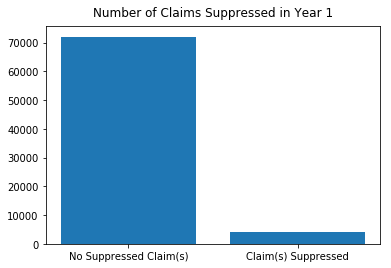

In [9]:
plt.bar(df_target_Y2['ClaimsTruncated'].unique(),df_target_Y2['ClaimsTruncated'].value_counts(dropna=False))
plt.title('Number of Claims Suppressed in Year 1',pad=10)
plt.xticks([0,1],['No Suppressed Claim(s)','Claim(s) Suppressed']);

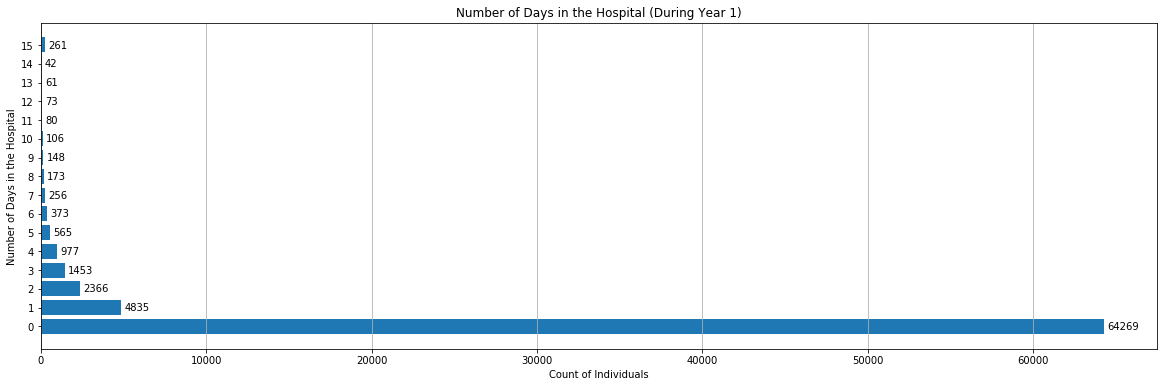

In [10]:
days = df_target_Y2['DaysInHospital'].unique()
days.sort()
inds = df_target_Y2['DaysInHospital'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(20,6))
plt.barh(days,inds)
plt.grid(b=None, which='major', axis='x')
for d in days:
    plt.text(inds[d]+200, d, str(inds[d]), color='black', va='center')
plt.yticks(range(0,16),range(0,16))
plt.ylabel('Number of Days in the Hospital')
plt.xlabel('Count of Individuals')
plt.title('Number of Days in the Hospital (During Year 1)');

#### TASK:  The 0 value records distort the scale.  Present the visualization in log scale.

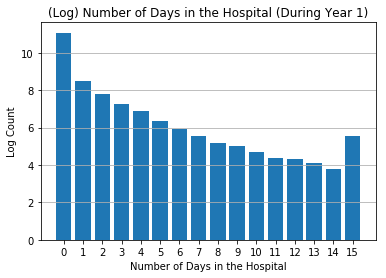

In [11]:
log_inds = np.log1p(inds)
plt.figure(figsize=(6,4))
plt.bar(days,log_inds)
plt.grid(which='major', axis='y')
plt.xticks(range(0,16),range(0,16))
plt.ylabel('Log Count')
plt.xlabel('Number of Days in the Hospital')
plt.title('(Log) Number of Days in the Hospital (During Year 1)');

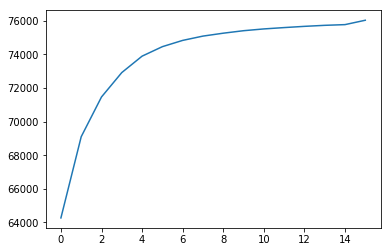

In [25]:
plt.plot(np.cumsum(inds))

#### TASK: Visualize a cumulative distribution. 

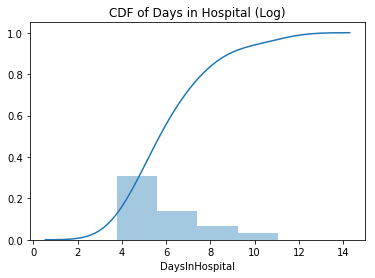

In [23]:
plt.figure(figsize=(6,4))
plt.title('CDF of Days in Hospital (Log)')
sns.distplot(log_inds, hist=True, kde_kws={'cumulative': True});

#### Adding feature to reflect the year of service associated with ClaimsTruncated feature
Remember, DaysInHospital is our target. We will be dropping this. Year of service for ClaimsTruncated is the year prior to the target data, which we will reflect in our Year feature. This feature will allow us to retain knowledge of the source table (Y2, Y3, etc.) after we merge these together.

In [12]:
# Calculate a log target for days in the hospital

df_target_Y2['label'] = np.log(df_target_Y2['DaysInHospital'] + 1)
df_target_Y3['label'] = np.log(df_target_Y3['DaysInHospital'] + 1)

# Add column for year of the associated claims 
df_target_Y2['Year'] = 'Y1'
df_target_Y3['Year'] = 'Y2'


In [13]:
df_target_Y2.head()

,MemberID,ClaimsTruncated,DaysInHospital,label,Year
0,24027423,0,0,0.000000,Y1
1,98324177,0,0,0.000000,Y1
2,33899367,1,1,0.693147,Y1
3,5481382,0,1,0.693147,Y1
4,69908334,0,0,0.000000,Y1


### Second Table: Claims Data

In [14]:
df_claims = load_data(os.path.join(DATA_DIR, 'Claims.csv'), 'claims')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668990 entries, 0 to 2668989
Data columns (total 14 columns):
MemberID                 int64
ProviderID               float64
Vendor                   float64
PCP                      float64
Year                     object
Specialty                object
PlaceSvc                 object
PayDelay                 object
LengthOfStay             object
DSFS                     object
PrimaryConditionGroup    object
CharlsonIndex            object
ProcedureGroup           object
SupLOS                   int64
dtypes: float64(3), int64(2), object(9)
memory usage: 285.1+ MB
None


,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,Y3,Internal,Office,50,NaN,7- 8 months,NEUMENT,1-2,EM,0


In [15]:
# payment delay values are all integers except 162+ (where value is capped)
df_claims['PayDelay'].value_counts()[:10]

0       141451
162+     92592
28       87286
23       85165
29       83899
22       83380
24       82660
30       78784
21       78751
31       73889
Name: PayDelay, dtype: int64

#### Convert 162+ to numeric value so we can treat this feature as numeric (integer) instead of categorical

In [16]:
df_claims['PayDelay'] = np.where(df_claims['PayDelay']=='162+', 162, df_claims['PayDelay'])
df_claims['PayDelay'] = df_claims['PayDelay'].astype(int)

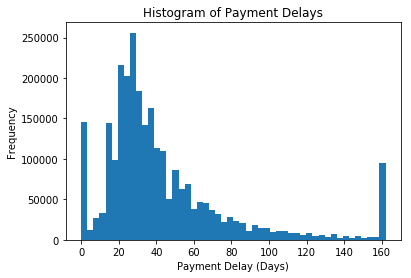

In [17]:
plt.hist(df_claims['PayDelay'].values, bins=50)
plt.title('Histogram of Payment Delays')
plt.xlabel('Payment Delay (Days)')
plt.ylabel('Frequency');

#### We can join claims and DaysInHospital tables to visualize how each facet of these features relates to our target

In [18]:
# inner join of df_claims and df_target_Y2
merged = pd.merge(left=df_claims, right=df_target_Y2, left_on='MemberID', right_on='MemberID')

In [19]:
merged.columns

Index(['MemberID', 'ProviderID', 'Vendor', 'PCP', 'Year_x', 'Specialty',
       'PlaceSvc', 'PayDelay', 'LengthOfStay', 'DSFS', 'PrimaryConditionGroup',
       'CharlsonIndex', 'ProcedureGroup', 'SupLOS', 'ClaimsTruncated',
       'DaysInHospital', 'label', 'Year_y'],
      dtype='object')

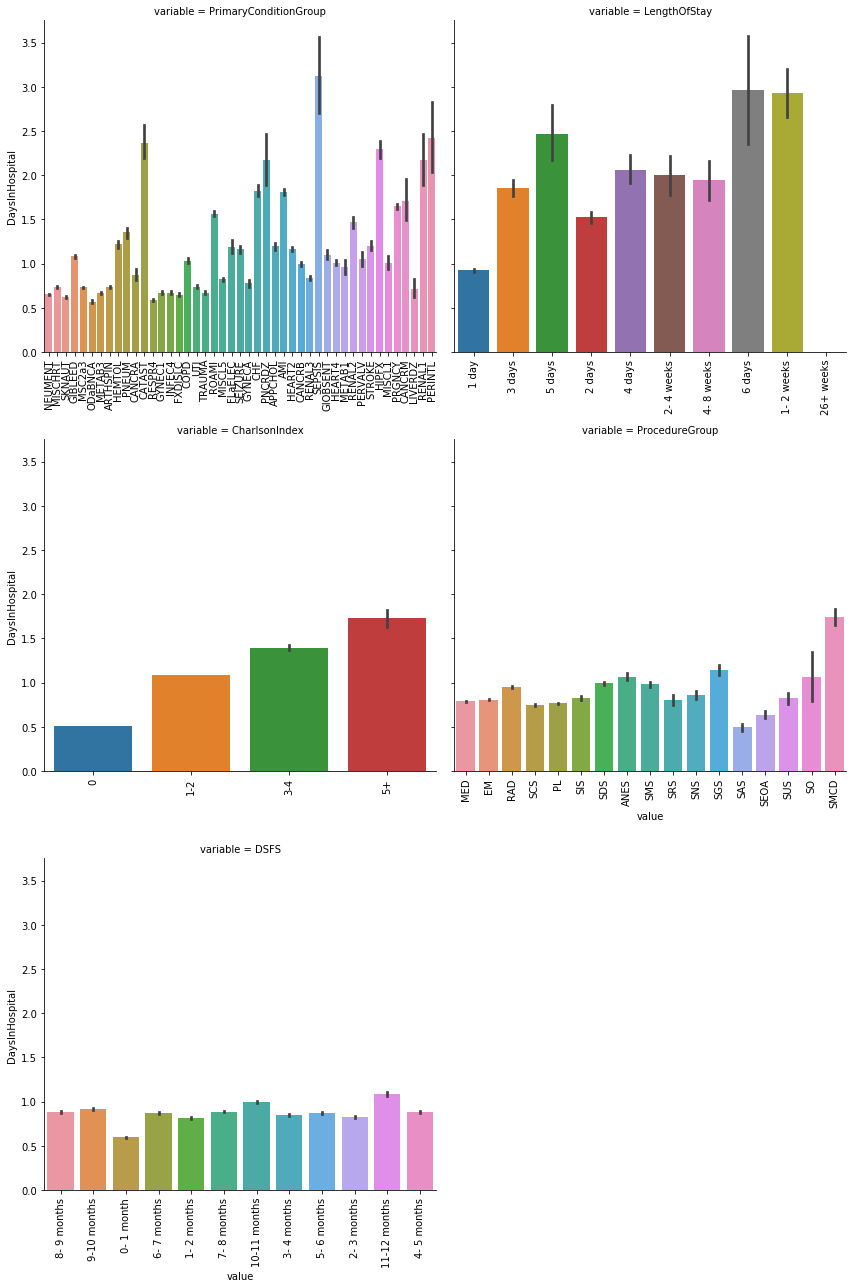

<Figure size 432x216 with 0 Axes>

<Figure size 432x216 with 0 Axes>

<Figure size 432x216 with 0 Axes>

<Figure size 432x216 with 0 Axes>

<Figure size 432x216 with 0 Axes>

In [20]:
# evaluate how facets of each feature relate to number of days in hospital
def plot(x,y,**kwargs):
    sns.barplot(x,y)
    plt.xticks(rotation='vertical')
    plt.figure(figsize = (6,3));

cat_vars = ['PrimaryConditionGroup','LengthOfStay','CharlsonIndex','ProcedureGroup', 'DSFS']
df = pd.melt(merged,id_vars='DaysInHospital', value_vars=cat_vars)
grid = sns.FacetGrid(df, col='variable', col_wrap=2, sharex=False, sharey=True, size = 6)
grid = grid.map(plot, 'value', 'DaysInHospital');

#### TASK: Are there similar insights you can identify by exploring the value_counts of other claims features?

In [21]:
df_claims['DSFS'].value_counts(dropna=False)

0- 1 month      707721
1- 2 months     247343
2- 3 months     225216
3- 4 months     212214
5- 6 months     192000
4- 5 months     189001
6- 7 months     180662
7- 8 months     175191
8- 9 months     171878
9-10 months     151527
10-11 months    116328
NaN              52770
11-12 months     47139
Name: DSFS, dtype: int64

##### **Can we differentiate patients by low, medium and high claims?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [22]:
memb_all = df_claims['MemberID'].nunique()
memb_5plus = df_claims['MemberID'].value_counts()>=5
memb_40plus = df_claims['MemberID'].value_counts()>=40
print('Percentage with 10 or more claims:', np.round((sum(memb_5plus)/memb_all),2))
print('Percentage with 40 or more claims:', np.round((sum(memb_40plus)/memb_all),2))

Percentage with 10 or more claims: 0.78
Percentage with 40 or more claims: 0.2


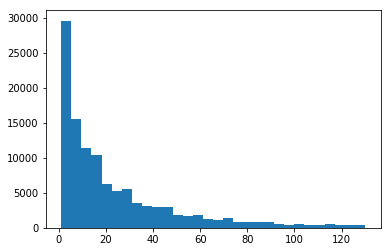

In [23]:
plt.hist(df_claims['MemberID'].value_counts(), bins = 30);

In [24]:
# payment delay values are all integers except 162+ (where value is capped)
df_claims['LengthOfStay'].value_counts(dropna=False)

NaN           2597392
1 day           56696
2 days           6485
3 days           3246
4 days           1473
1- 2 weeks       1143
2- 4 weeks        961
4- 8 weeks        903
5 days            510
6 days            179
26+ weeks           2
Name: LengthOfStay, dtype: int64

In [25]:
# payment delay values are all integers except 162+ (where value is capped)
df_claims['CharlsonIndex'].value_counts()[:10]

0      1356995
1-2    1256527
3-4      49479
5+        5989
Name: CharlsonIndex, dtype: int64

#### Build transformation functions to perform feature engineering on claims data

Examples might include converting ordinal categories to numerical approximations or aggregating existing features to create additional features. Following is an example to perform these transformations in a pipeline.

In [26]:
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X

In [27]:
# Create aggregate features (via pipeline)
class ClaimAggregater(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        agg_op_dt_claim = {
            'PayDelay': {
                'max_PayDelay': 'max',
                'min_PayDelay': 'min',
                'avg_PayDelay': 'mean'
            },
            'LengthOfStay': {
                'max_LOS': 'max',
                'min_LOS': 'min',
                'avg_LOS': 'mean'
            },
            'DSFS': {
                'max_dsfs': 'max',
                'min_dsfs': 'min',
                'avg_dsfs': 'mean'
            },
            'CharlsonIndex': {
                'max_CharlsonIndex': 'max',
                'min_CharlsonIndex': 'min',
                'avg_CharlsonIndex': 'mean'
            }
        }
        result = X.groupby(['Year', 'MemberID']).agg(agg_op_dt_claim)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=['Year', 'MemberID'])
        result['range_dsfs'] = result['max_dsfs'] - result['min_dsfs']
        result['range_CharlsonIndex'] = result['max_CharlsonIndex'] - result['min_CharlsonIndex']
        return result

In [28]:
claim_pipeline = Pipeline([
    ('claim_adder', ClaimAttributesAdder()),
    ('claim_aggregater', ClaimAggregater()),
    ])
df_claims_aggregated = claim_pipeline.transform(df_claims)

In [29]:
df_claims_aggregated.head()

,Year,MemberID,max_PayDelay,min_PayDelay,avg_PayDelay,max_LOS,min_LOS,avg_LOS,max_dsfs,min_dsfs,avg_dsfs,max_CharlsonIndex,min_CharlsonIndex,avg_CharlsonIndex,range_dsfs,range_CharlsonIndex
0,Y1,210,162,22,90.000000,2.0,2.0,2.0,10.0,1.0,3.500000,0,0,0.000000,9.0,0
1,Y1,3197,162,36,98.400000,NaN,NaN,NaN,6.0,1.0,2.600000,0,0,0.000000,5.0,0
2,Y1,3889,162,33,70.692308,2.0,1.0,1.5,2.0,1.0,1.076923,2,0,0.615385,1.0,2
3,Y1,4187,162,29,85.000000,NaN,NaN,NaN,9.0,1.0,3.750000,0,0,0.000000,8.0,0
4,Y1,9063,68,39,60.250000,NaN,NaN,NaN,2.0,1.0,1.250000,0,0,0.000000,1.0,0


#### TASK: Are there additional features you can engineer? 
The example provided is only an example. You can do better! Ideally, additional features should add insight that is not already present in the data.

** Simplify "LengthOfStay" feature **

Approximately 97% of LengthOfStay feature is NaN (claim did not involve hospitalization?), and nearly 80% of the non-null values are one day. This is such a dramatric disparity that log transformation provides minimal benefit. 

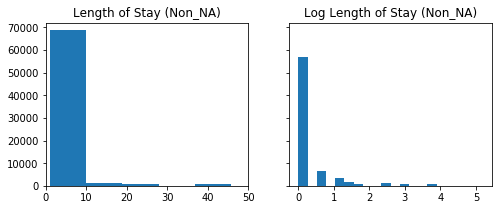

In [30]:
los = np.where(df_claims['LengthOfStay']>0)[0]
df_claims['LengthOfStay'].iloc[los].value_counts(dropna=False)
log_los = np.log(df_claims['LengthOfStay'].iloc[los])
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,3))
ax[0].set_xlim(0,50)
ax[0].hist(df_claims['LengthOfStay'].iloc[los], bins=20)
ax[0].set_title('Length of Stay (Non_NA)')
ax[1].hist(log_los, bins=20)
ax[1].set_title('Log Length of Stay (Non_NA)');

The specific length of stay may not be adding much value.  Rather than converting LOS categories to numerical equivalents (e.g., 1-2 weeks = 11, 2-4 weeks = 21), try reducing this feature to a binary (i.e., hospitalized / not hospitalized) or a simplify to 0 (not hospitalized), 1 (hospitalized for one day), 2 (hospitalized for more than one day). 

### Third Table: Drug Data

In [31]:
df_drug_count = load_data(os.path.join(DATA_DIR, 'DrugCount.csv'), 'drug_count')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818241 entries, 0 to 818240
Data columns (total 4 columns):
MemberID     818241 non-null int64
Year         818241 non-null object
DSFS         818241 non-null object
DrugCount    818241 non-null object
dtypes: int64(1), object(3)
memory usage: 25.0+ MB
None


,MemberID,Year,DSFS,DrugCount
0,48925661,Y2,9-10 months,7+
1,90764620,Y3,8- 9 months,3


#### Perform similar feature transformations for drug data

In [32]:
df_drug_count['DrugCount'].value_counts(dropna=False)

1     263501
2     188559
3     129881
4      87783
5      57768
7+     54018
6      36731
Name: DrugCount, dtype: int64

In [33]:
df_drug_count['DSFS'].value_counts(dropna=False)

0- 1 month      108980
1- 2 months      81395
2- 3 months      78528
3- 4 months      77044
4- 5 months      73325
5- 6 months      72274
6- 7 months      69350
7- 8 months      67433
8- 9 months      62700
9-10 months      55984
10-11 months     46184
11-12 months     25044
Name: DSFS, dtype: int64

In [34]:
# preprocess via pipeline
class DrugAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):  
        dsfs_dt = {'0- 1 month': 15, '1- 2 months': 45, '2- 3 months': 75, '3- 4 months': 105, 
                   '4- 5 months': 135, '5- 6 months': 165, '6- 7 months': 195, '7- 8 months': 225, 
                   '8- 9 months': 255, '9-10 months': 285, '10-11 months': 315, '11-12 months': 345}
        X['DSFS'] = X['DSFS'].apply(lambda x: dsfs_dt[x])
        X['DrugCount'] = X['DrugCount'].apply(lambda x: 7 if x == '7+' else int(x))
        return X

In [35]:
agg_op_dt_drug = {
    'DrugCount': {
        'max_DrugCount': 'max',
        'min_DrugCount': 'min',
        'avg_DrugCount': 'mean',
        'months_DrugCount': 'count'
    }
}

In [36]:
# aggregate by MemberID and year (via pipeline)
class DrugAggregater(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        agg_op_dt_drug = {
            'DrugCount': {
                'max_DrugCount': 'max',
                'min_DrugCount': 'min',
                'avg_DrugCount': 'mean',
                'months_DrugCount': 'count'
            }
        }
        result = X.groupby(['Year', 'MemberID']).agg(agg_op_dt_drug)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=['Year', 'MemberID'])
        return result

In [37]:
df_drug_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818241 entries, 0 to 818240
Data columns (total 4 columns):
MemberID     818241 non-null int64
Year         818241 non-null object
DSFS         818241 non-null object
DrugCount    818241 non-null object
dtypes: int64(1), object(3)
memory usage: 25.0+ MB


In [38]:
drug_pipeline = Pipeline([
    ('drug_adder', DrugAttributesAdder()),
    ('drug_aggregater', DrugAggregater())
    ])
df_drug_count_aggregated = drug_pipeline.transform(df_drug_count)

In [39]:
df_drug_count_aggregated.head()

,Year,MemberID,max_DrugCount,min_DrugCount,avg_DrugCount,months_DrugCount
0,Y1,210,2,1,1.666667,3
1,Y1,3197,2,1,1.250000,4
2,Y1,3889,5,2,3.000000,10
3,Y1,4187,7,3,6.100000,10
4,Y1,9063,1,1,1.000000,2


### Fourth Table: Lab Data

In [40]:
df_lab_count = load_data(os.path.join(DATA_DIR, 'LabCount.csv'), 'lab_count')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361484 entries, 0 to 361483
Data columns (total 4 columns):
MemberID    361484 non-null int64
Year        361484 non-null object
DSFS        361484 non-null object
LabCount    361484 non-null object
dtypes: int64(1), object(3)
memory usage: 11.0+ MB
None


,MemberID,Year,DSFS,LabCount
0,69258001,Y3,2- 3 months,1
1,10143167,Y1,0- 1 month,2


In [41]:
df_lab_count['LabCount'].value_counts(dropna=False)

1      93744
2      54183
3      43472
4      38815
5      34900
6      27705
10+    23110
7      20591
8      14885
9      10079
Name: LabCount, dtype: int64

In [42]:
# preprocess via pipeline
class LabAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        dsfs_dt = {'0- 1 month': 15, '1- 2 months': 45, '2- 3 months': 75, '3- 4 months': 105, 
           '4- 5 months': 135, '5- 6 months': 165, '6- 7 months': 195, '7- 8 months': 225, 
           '8- 9 months': 255, '9-10 months': 285, '10-11 months': 315, '11-12 months': 345}
        X['DSFS'] = X['DSFS'].apply(lambda x: dsfs_dt[x])
        X['LabCountI'] = X['LabCount'].apply(lambda x: 10 if x == '10+' else int(x))
        return X

In [43]:
# Aggregate via pipeline
class LabAggregater(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        agg_op_dt_lab = {
            'LabCountI': {
                'max_LabCount': 'max',
                'min_LabCount': 'min',
                'avg_LabCount': 'mean',
                'months_LabCount': 'count'
            }
        }
        result = X.groupby(['Year', 'MemberID']).agg(agg_op_dt_lab)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=['Year', 'MemberID'])
        return result

In [44]:
lab_pipeline = Pipeline([
    ('lab_adder', LabAttributesAdder()),
    ('lab_aggregater', LabAggregater())
    ])
df_lab_count_aggregated = lab_pipeline.transform(df_lab_count)

In [45]:
df_lab_count_aggregated.head()

,Year,MemberID,max_LabCount,min_LabCount,avg_LabCount,months_LabCount
0,Y1,210,2,2,2.0,1
1,Y1,3889,10,10,10.0,1
2,Y1,11951,3,3,3.0,1
3,Y1,14661,2,2,2.0,1
4,Y1,14778,2,2,2.0,1


### Fifth Table: Members Data

In [46]:
df_members = load_data(os.path.join(DATA_DIR, 'Members.csv'), 'members')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113000 entries, 0 to 112999
Data columns (total 3 columns):
MemberID           113000 non-null int64
AgeAtFirstClaim    107247 non-null object
Sex                95448 non-null object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB
None


,MemberID,AgeAtFirstClaim,Sex
0,14723353,70-79,M
1,75706636,70-79,M


In [47]:
df_members['AgeAtFirstClaim'].value_counts(dropna=False)

40-49    16111
70-79    14514
50-59    13329
60-69    12622
30-39    12435
10-19    11319
0-9      10791
20-29     8505
80+       7621
NaN       5753
Name: AgeAtFirstClaim, dtype: int64

In [48]:
# separate AgeAtFirstClaim and Sex features for separate pre-processing
df_members_age = df_members.drop('Sex',axis=1)
df_members_sex = pd.DataFrame(df_members['Sex'],columns=['Sex'])

In [49]:
# convert 'AgeAtFirstClaim' to numerical approximation
class MemberAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        age_dt = {'40-49': 45, '70-79': 75, '50-59': 55, '60-69': 65, '30-39': 35,
          '10-19': 15, '0-9': 5, '20-29': 25, '80+': 85}
        X['AgeAtFirstClaim'] = X['AgeAtFirstClaim'].apply(lambda x: None if pd.isnull(x) else age_dt[x])
        return X
    
adder = MemberAttributesAdder()
df_members = adder.fit_transform(df_members_age)

#### There are a lot of NaN values in the 'Sex' feature. One approach is to handle this through the One Hot Encoding process.

In [50]:
df_members_sex['Sex'].value_counts(dropna=False)

F      51482
M      43966
NaN    17552
Name: Sex, dtype: int64

In [51]:
# convert 'Sex' feature to numerical and OHE to account for NaN values (i.e., F=0, M=0)
class MemberLabelEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X['Sex'] = np.where(X['Sex'].isnull(),'NaN',X['Sex'])
        self.le = LabelEncoder()
        self.le.fit(X['Sex'])
        self.classes = self.le.classes_
        return self
    def transform(self, X, y=None): 
        X['Sex'] = np.where(X['Sex'].isnull(),'NaN',X['Sex'])
        X['Sex'] = self.le.transform(X['Sex'])
        return X

class DropOneColumn(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        classes = member_cat_pipeline.named_steps.encoder.classes
        X = pd.DataFrame(X[:,:2], columns=classes[:2])
        return X
    
member_cat_pipeline = Pipeline([('encoder', MemberLabelEncoder()),
                                ('ohe', OneHotEncoder(sparse=False)),
                                ('dropcol', DropOneColumn())
                               ])
df_members_sex = member_cat_pipeline.fit_transform(df_members_sex)

In [52]:
# rejoin Age and Sex columns
df_members[['F','M']] = df_members_sex

In [53]:
df_members.head()

,MemberID,AgeAtFirstClaim,F,M
0,14723353,75.0,0.0,1.0
1,75706636,75.0,0.0,1.0
2,17320609,75.0,0.0,1.0
3,69690888,45.0,0.0,1.0
4,33004608,5.0,0.0,1.0


## Merge Data
We have been processing each table separately to this point. Now we will combine all of our data into one dataset (df_merged). 

In [54]:
# 1. Union Target DataFrames Across Years
df_merged = pd.concat([df_target_Y2, df_target_Y3])

# 2. Join/Merge in Members Data
df_merged = df_merged.merge(df_members, how='left', on='MemberID')

# 3. Join/Merge in Aggregated Claims Data
df_merged = df_merged.merge(df_claims_aggregated, how='left', on=['MemberID', 'Year'])

# 4. Join/Merge in Aggregated Drug Data
df_merged = df_merged.merge(df_drug_count_aggregated, how='left', on=['MemberID', 'Year'])

# 5. Join/Merge in Aggregated Lab Data
df_merged = df_merged.merge(df_lab_count_aggregated, how='left', on=['MemberID', 'Year'])


In [55]:
display(df_merged.head(1))
display(df_claims_aggregated.head(1))

,MemberID,ClaimsTruncated,DaysInHospital,label,Year,AgeAtFirstClaim,F,M,max_PayDelay,min_PayDelay,...,range_dsfs,range_CharlsonIndex,max_DrugCount,min_DrugCount,avg_DrugCount,months_DrugCount,max_LabCount,min_LabCount,avg_LabCount,months_LabCount
0,24027423,0,0,0.0,Y1,35.0,0.0,1.0,35,27,...,2.0,4,3.0,3.0,3.0,1.0,7.0,7.0,7.0,1.0


,Year,MemberID,max_PayDelay,min_PayDelay,avg_PayDelay,max_LOS,min_LOS,avg_LOS,max_dsfs,min_dsfs,avg_dsfs,max_CharlsonIndex,min_CharlsonIndex,avg_CharlsonIndex,range_dsfs,range_CharlsonIndex
0,Y1,210,162,22,90.0,2.0,2.0,2.0,10.0,1.0,3.5,0,0,0.0,9.0,0


In [56]:
# drop columns we will not be using for analysis
df_final = df_merged.drop(['MemberID', 'DaysInHospital', 'Year'], axis=1)
df_final.shape

(147473, 27)

In [57]:
#  'label' is our log-transformed target. we will need to separate this out before we build our model.
df_final.head()

,ClaimsTruncated,label,AgeAtFirstClaim,F,M,max_PayDelay,min_PayDelay,avg_PayDelay,max_LOS,min_LOS,...,range_dsfs,range_CharlsonIndex,max_DrugCount,min_DrugCount,avg_DrugCount,months_DrugCount,max_LabCount,min_LabCount,avg_LabCount,months_LabCount
0,0,0.000000,35.0,0.0,1.0,35,27,30.400000,NaN,NaN,...,2.0,4,3.0,3.0,3.000000,1.0,7.0,7.0,7.000000,1.0
1,0,0.000000,35.0,0.0,1.0,146,23,70.666667,NaN,NaN,...,0.0,0,1.0,1.0,1.000000,1.0,7.0,7.0,7.000000,1.0
2,1,0.693147,85.0,1.0,0.0,162,13,45.000000,NaN,NaN,...,9.0,0,6.0,1.0,2.300000,10.0,1.0,1.0,1.000000,1.0
3,0,0.693147,25.0,1.0,0.0,162,28,68.000000,NaN,NaN,...,9.0,0,2.0,1.0,1.111111,9.0,2.0,1.0,1.666667,3.0
4,0,0.000000,65.0,1.0,0.0,77,22,48.117647,NaN,NaN,...,9.0,0,4.0,1.0,1.777778,9.0,8.0,8.0,8.000000,1.0


# EDA

In [58]:
corr_matrix = df_final.corr()
corr_matrix["label"].sort_values(ascending=False)

label                  1.000000
max_DrugCount          0.173162
ClaimsTruncated        0.167734
max_CharlsonIndex      0.161397
avg_DrugCount          0.157510
avg_CharlsonIndex      0.151023
AgeAtFirstClaim        0.146692
months_LabCount        0.135606
months_DrugCount       0.135003
max_dsfs               0.128256
range_dsfs             0.127710
range_CharlsonIndex    0.120726
avg_dsfs               0.118638
max_PayDelay           0.111504
min_CharlsonIndex      0.102417
max_LabCount           0.095338
max_LOS                0.078603
avg_LOS                0.065573
min_DrugCount          0.061915
min_LOS                0.034003
avg_LabCount           0.033287
min_dsfs               0.026244
avg_PayDelay          -0.004391
min_LabCount          -0.025444
F                     -0.046683
min_PayDelay          -0.071457
M                     -0.090794
Name: label, dtype: float64

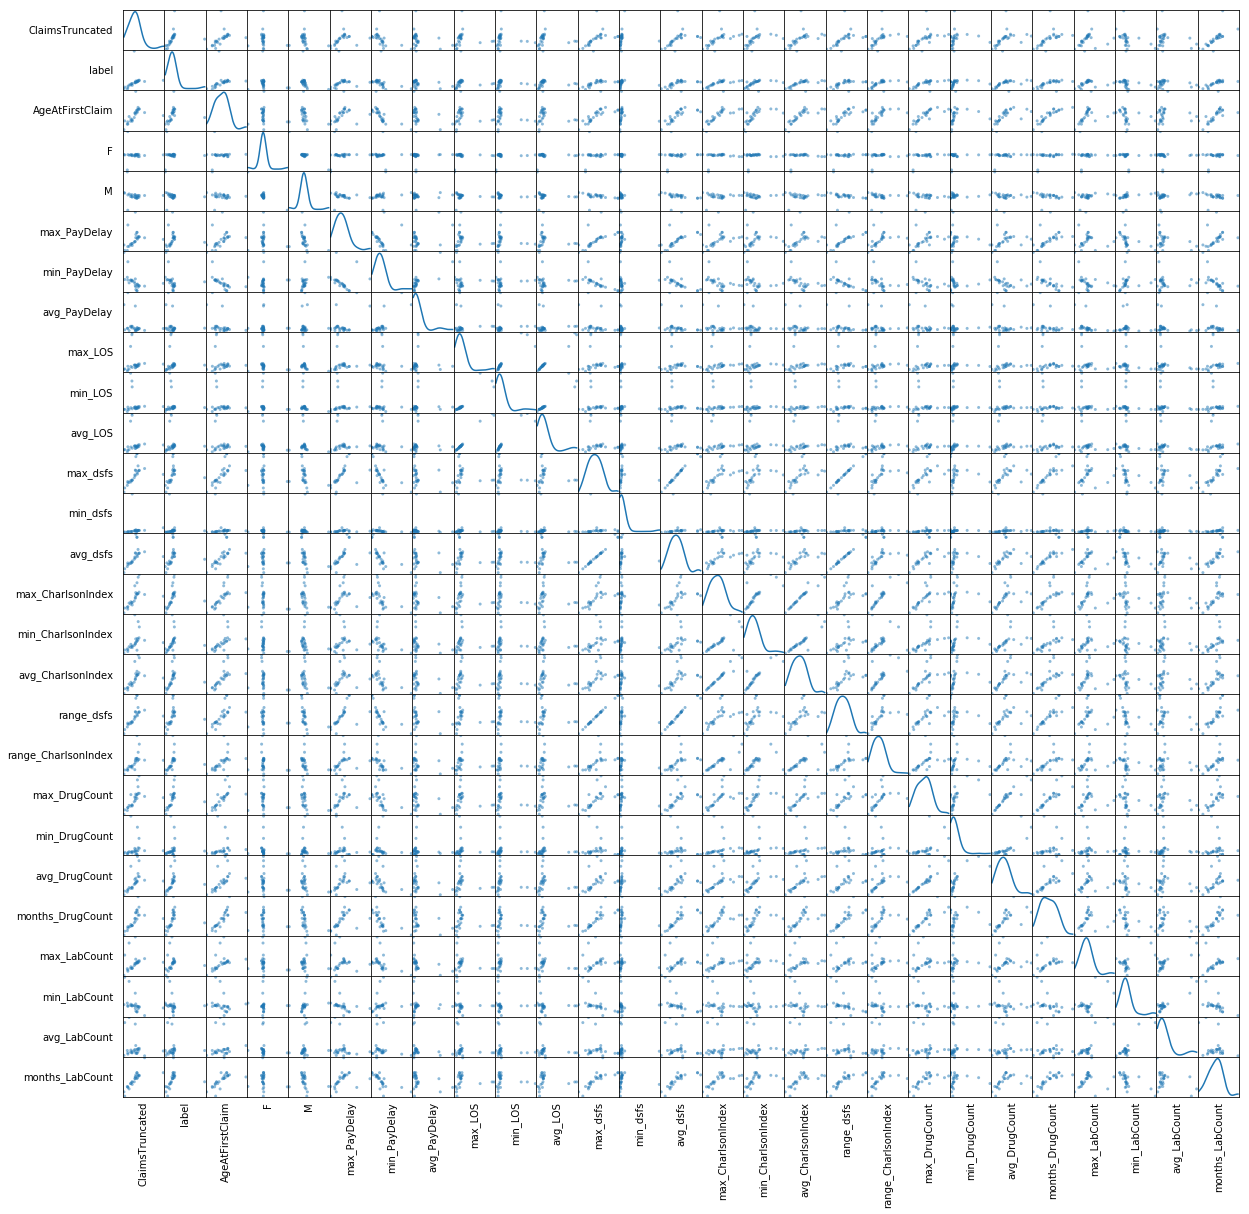

In [59]:
sm = pd.plotting.scatter_matrix(corr_matrix, figsize=(20,20), diagonal='kde')

[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.set_ylabel(s.get_ylabel(), va='center', ha='right', rotation=0, labelpad=10) for s in sm.reshape(-1)]
[s.tick_params(axis='y', which='major', pad=40) for s in sm.reshape(-1)]
[s.set_xticks([]) for s in sm.reshape(-1)]
[s.set_yticks([]) for s in sm.reshape(-1)];

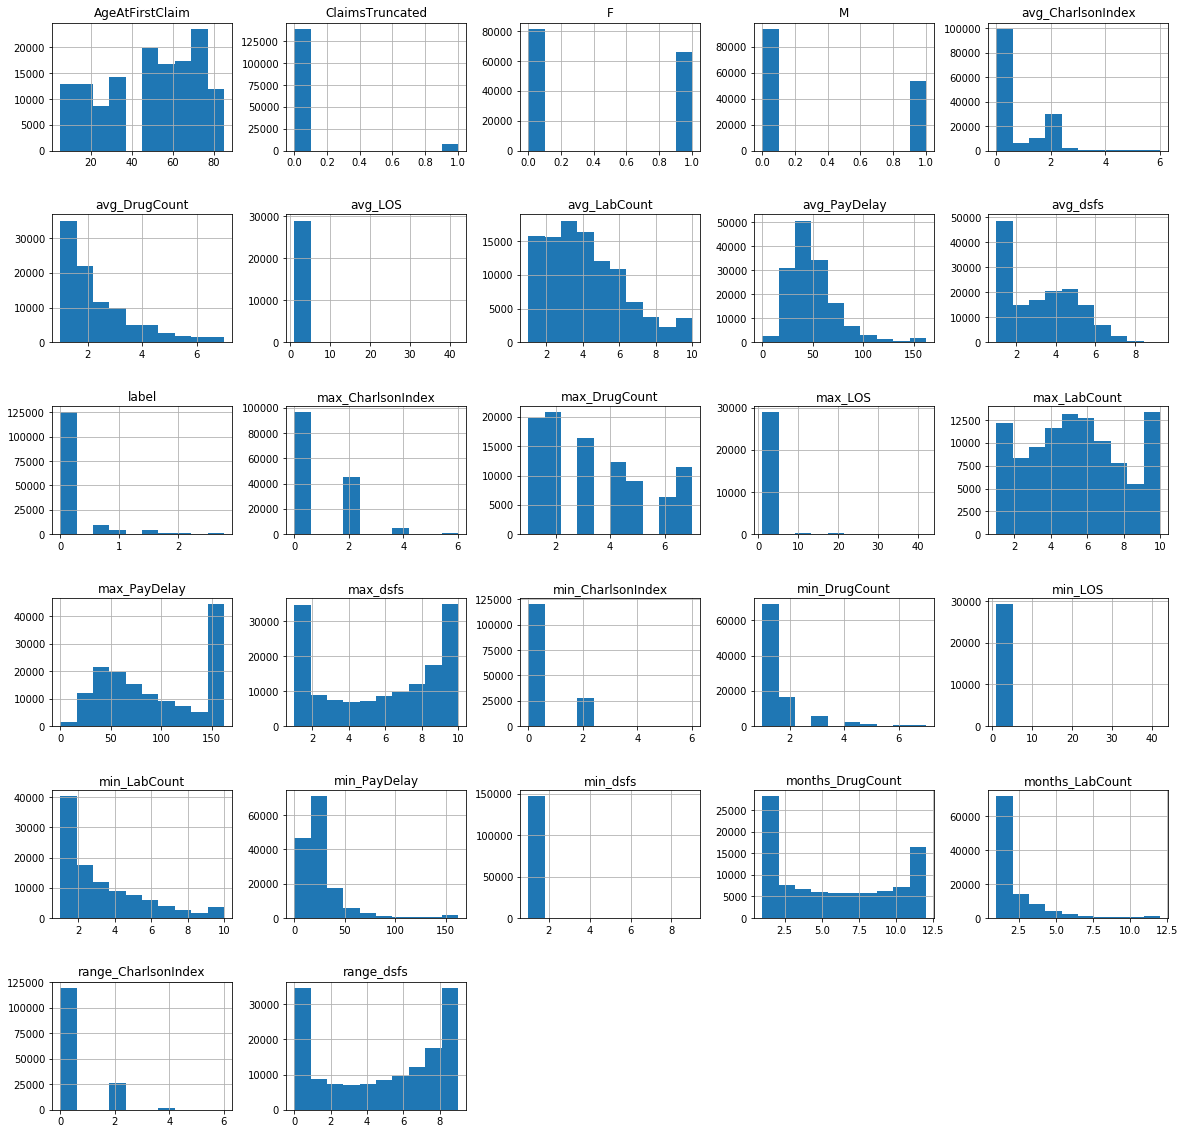

In [60]:
df_final.hist(figsize=(20,20))
plt.subplots_adjust(hspace=.5);

# HHPError  prediction perfromance measure

We will report model performance in terms of the `HHPError` which is defined below.

The [HHP prediction accuracy measure](https://www.heritagehealthprize.com/c/hhp/details/evaluation) is the log root-mean-squared-error (log RMSE) loss function, known as the **HHPError**

\begin{equation}
HHPError = \sqrt{\frac{1}{n}\displaystyle\sum_{i=1}^{n}{[log(p_i + 1) - log(a_i + 1)]\,^2}}
\end{equation}

where 
1.  $i$ is a member;  
2.  $n$ is the total number of members;  
3.  $p_i$ is the predicted number of days spent in the hospital for member $i$ in the test period;  
4.  $a_i$ is the actual number of days spent in the hospital for member $i$ in the test period. 


# Training Pipeline 

In [61]:
# split data into a trainin set (70%), validation set (15%) and blind (holdout) test set (15%)
df_train, df_other = train_test_split(df_final, test_size=0.3, random_state=42)
df_val, df_test = train_test_split(df_other, test_size=0.5, random_state=42)

In [62]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(103231, 27)
(22121, 27)
(22121, 27)


In [63]:
# separate target data in y variables
y_train = df_train['label']
y_val = df_val['label']
y_test = df_test['label']

In [64]:
df_train.columns

Index(['ClaimsTruncated', 'label', 'AgeAtFirstClaim', 'F', 'M', 'max_PayDelay',
       'min_PayDelay', 'avg_PayDelay', 'max_LOS', 'min_LOS', 'avg_LOS',
       'max_dsfs', 'min_dsfs', 'avg_dsfs', 'max_CharlsonIndex',
       'min_CharlsonIndex', 'avg_CharlsonIndex', 'range_dsfs',
       'range_CharlsonIndex', 'max_DrugCount', 'min_DrugCount',
       'avg_DrugCount', 'months_DrugCount', 'max_LabCount', 'min_LabCount',
       'avg_LabCount', 'months_LabCount'],
      dtype='object')

In [65]:
# Identify the numeric features we wish to consider (note: we will not include 'label' as this is our target. 
num_attribs = ['ClaimsTruncated', 'AgeAtFirstClaim', 'min_PayDelay', 'max_PayDelay', 'avg_PayDelay',
               'min_LOS', 'avg_LOS', 'max_LOS', 'max_dsfs', 'min_dsfs', 'avg_dsfs', 'max_CharlsonIndex',
               'min_CharlsonIndex', 'avg_CharlsonIndex', 'range_dsfs', 'range_CharlsonIndex', 'max_DrugCount', 
               'min_DrugCount', 'avg_DrugCount', 'months_DrugCount', 'max_LabCount', 'min_LabCount',
               'avg_LabCount', 'months_LabCount']

# Create a pipeline for the numeric features.
# Missing values will be imputed using the feature median.
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# Identify the categorical features we wish to consider.
cat_attribs = [
    'F','M'
]

# Identiy the range of expected values for the categorical features.
cat_values = [
    ['Sex_f', 'Sex_male']  # Sex
]

# Create a pipelne for the categorical features.
# Since we already transformed the 'sex' feature in section 2.2.5, we need only select the new OHE features.  
# We have done the label encoding and OHE here as part of our preprocessing pipeline.
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
    ])
df_attribs = num_attribs+cat_attribs

# Union the transformed, scaled numeric and categorical features.
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [66]:
# Use full processing pipeline to create final X_train, X_val and X_test datasets
X_train = full_pipeline.fit_transform(df_train)
X_val = full_pipeline.transform(df_val)
X_test = full_pipeline.transform(df_test)

## TASK: Extend the pre-processing pipeline to creare a full (end-to-end) ML Pipeline
Can you build a pipeline to include hyperparameter search, cross validation, feature selection, and generate a prediction?

# Generate predictions using a baseline estimator
As a baseline, we will build a model that predicts Days in Hospital based solely on the average number of days in the hospital for the training data.  We use "negative mean squared error" as the cross validation score. We multiply that by -1 to get the usual "mean squared error" and take the square root to obtain RMSE.

In [67]:
from sklearn.dummy import DummyRegressor
model = DummyRegressor(strategy='mean')
cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
baseline_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
baseline_train_score = np.sqrt(-baseline_scores.mean())

start = time()
model.fit(X_train, y_train)
baseline_train_predict = model.fit(X_train, y_train)
train_time = np.round(time()-start,3)

start = time()
baseline_test_predict = model.predict(X_val)
baseline_test_score = np.sqrt(mean_squared_error(y_val, baseline_test_predict))
test_time = np.round(time()-start,3)

In [68]:
results = pd.DataFrame(columns=["ExpID", "Train RMSE (Mean)", "Test RMSE", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])
results.loc[0] = ["Baseline Model (Mean)", round(baseline_train_score, 4), round(baseline_test_score, 4), "---", train_time, test_time, "Predict mean of target values"]

In [69]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean),0.4823,0.4791,---,0.001,0.0,Predict mean of target values


# Model comparison via statistical significance tests
Build a second model and compare results against baseline using a t-test.

In [70]:
regressors = [
    ('Linear Regression', LinearRegression()),
]

for idx, (name, regressor) in enumerate(regressors, 1):
    start = time()
    regressor.fit(X_train, y_train)
    cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
    cv_scores = cross_val_score(regressor, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-cv_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    test_preds = regressor.predict(X_val)
    test_score = np.sqrt(mean_squared_error(y_val, test_preds))
    test_time = np.round(time()-start,3)

    p_value = ttest(baseline_scores, cv_scores)
    results.loc[len(results)] = [ name, round(train_score, 4), round(test_score, 4), round(p_value, 4), train_time, test_time, 'Default parameters']

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-127.51, 0.00000)
Machine learning pipeline B is better than A


In [71]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean),0.4823,0.4791,---,0.001,0.000,Predict mean of target values
1,Linear Regression,0.4645,0.4603,0,2.748,0.001,Default parameters


## Results discussion

Over 30 folds, the simple linear regression with default parameters produced a better model in terms of root mean squared error than the baseline model (mean prediction) . The test accuracy of .46, means the model can predict the number of days a patient will stay in hospital with an error of $e^{.4603^2} - 1 = 0.235$ days. Note that when processing year data, we made log transformation to the `DaysInHospital` variable: `df_target_Y2['label'] = np.log(df_target_Y2['DaysInHospital'] + 1)`.

# Understand your best model and plan further improvements

We can look at the coefficients of our default linear regression model to see how different features are weighted. 

In [72]:
# features sorted by coefficient size
lr_model = dict(zip(num_attribs + cat_attribs, regressor.coef_))
coefs = sorted(lr_model.items(), key=lambda x: np.abs(x[1]), reverse=True)
display(pd.DataFrame(coefs, columns=['Features','Coefficients']))

,Features,Coefficients
0,max_CharlsonIndex,1.025730e+11
1,range_CharlsonIndex,-7.864748e+10
2,min_CharlsonIndex,-6.903463e+10
3,max_dsfs,-6.609354e+10
4,range_dsfs,6.606323e+10
5,min_dsfs,1.495995e+09
6,M,-1.764986e-01
7,F,-1.507812e-01
8,ClaimsTruncated,4.718830e-02
9,max_LOS,3.173898e-02


## TASK: Use PCA to identify the most important features.  Try other approaches to feature selection too.

See Section 9.4.3 below.

# Phase 1 

## Build additional claims features (see sections 2.2.2.3 & 2.2.2.5)

In [73]:
# Build two features based on ideas developed in Phase 1 (via pipeline)

class NewClaimsFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        # categorize members based on number of claims submitted
        claims_dict = dict(X['MemberID'].value_counts())
        X['ClaimsCategory'] = X['MemberID'].apply(lambda x: claims_dict[x])
        low = np.where(X['ClaimsCategory']<5)[0]
        med = np.where((X['ClaimsCategory']>=5) & (X['ClaimsCategory']<40))[0]
        high = np.where(X['ClaimsCategory']>=40)[0]
        X['ClaimsCategory'].loc[low] = 0
        X['ClaimsCategory'].loc[med] = 1
        X['ClaimsCategory'].loc[high] = 2
 
        # Categorize length of stay as 0, 1 or 2
        X['LOS'] = np.where(X['LengthOfStay'].isnull(), 0, X['LengthOfStay'])
        X['LOS'] = np.where(X['LengthOfStay'] > 1, 2, X['LengthOfStay'])
        return X

In [74]:
# Recreate aggregator function to include additional features in final dataframe (via pipeline)
class ClaimAggregater(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        agg_op_dt_claim = {
            'PayDelay': {
                'max_PayDelay': 'max',
                'min_PayDelay': 'min',
                'avg_PayDelay': 'mean'
            },
            'LengthOfStay': {
                'LengthOfStay': 'mean'
            },
            'DSFS': {
                'max_dsfs': 'max',
                'min_dsfs': 'min',
                'avg_dsfs': 'mean'
            },
            'CharlsonIndex': {
                'max_CharlsonIndex': 'max',
                'min_CharlsonIndex': 'min',
                'avg_CharlsonIndex': 'mean'
            },
            'ClaimsCategory': {
                'ClaimsCategory': 'mean'
            },
        }
        result = X.groupby(['Year', 'MemberID']).agg(agg_op_dt_claim)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=['Year', 'MemberID'])
        result['range_dsfs'] = result['max_dsfs'] - result['min_dsfs']
        result['range_CharlsonIndex'] = result['max_CharlsonIndex'] - result['min_CharlsonIndex']
        return result

In [75]:
# reload claims data and rerun the enhanced pipeline
df_claims = load_data(os.path.join(DATA_DIR, 'Claims.csv'), 'claims')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668990 entries, 0 to 2668989
Data columns (total 14 columns):
MemberID                 int64
ProviderID               float64
Vendor                   float64
PCP                      float64
Year                     object
Specialty                object
PlaceSvc                 object
PayDelay                 object
LengthOfStay             object
DSFS                     object
PrimaryConditionGroup    object
CharlsonIndex            object
ProcedureGroup           object
SupLOS                   int64
dtypes: float64(3), int64(2), object(9)
memory usage: 285.1+ MB
None


,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,Y3,Internal,Office,50,NaN,7- 8 months,NEUMENT,1-2,EM,0


In [76]:
claim_pipeline = Pipeline([
    ('claim_adder', ClaimAttributesAdder()),
    ('claim_features', NewClaimsFeatures()),
    ('claim_aggregater', ClaimAggregater()),
    ])
df_claims_aggregated = claim_pipeline.transform(df_claims)

In [77]:
df_claims_aggregated.head()

,Year,MemberID,max_PayDelay,min_PayDelay,avg_PayDelay,LengthOfStay,max_dsfs,min_dsfs,avg_dsfs,max_CharlsonIndex,min_CharlsonIndex,avg_CharlsonIndex,ClaimsCategory,range_dsfs,range_CharlsonIndex
0,Y1,210,162,22,90.000000,2.0,10.0,1.0,3.500000,0,0,0.000000,1,9.0,0
1,Y1,3197,162,36,98.400000,NaN,6.0,1.0,2.600000,0,0,0.000000,1,5.0,0
2,Y1,3889,162,33,70.692308,1.5,2.0,1.0,1.076923,2,0,0.615385,1,1.0,2
3,Y1,4187,162,29,85.000000,NaN,9.0,1.0,3.750000,0,0,0.000000,0,8.0,0
4,Y1,9063,68,39,60.250000,NaN,2.0,1.0,1.250000,0,0,0.000000,0,1.0,0


## Rerun the preprocessing pipeline to incorporate new claims features

In [78]:
# 1. Union Target DataFrames Across Years
df_merged = pd.concat([df_target_Y2, df_target_Y3])

# 2. Join/Merge in Members Data
df_merged = df_merged.merge(df_members, how='left', on='MemberID')

# 3. Join/Merge in Aggregated Claims Data
df_merged = df_merged.merge(df_claims_aggregated, how='left', on=['MemberID', 'Year'])

# 4. Join/Merge in Aggregated Drug Data
df_merged = df_merged.merge(df_drug_count_aggregated, how='left', on=['MemberID', 'Year'])

# 5. Join/Merge in Aggregated Lab Data
df_merged = df_merged.merge(df_lab_count_aggregated, how='left', on=['MemberID', 'Year'])


In [79]:
# drop columns we will not be using for analysis
df_final = df_merged.drop(['MemberID', 'DaysInHospital', 'Year'], axis=1)
df_final.shape

(147473, 26)

Note that we had (147473, 27) prior to Phase 1. We have replaced the aggregated LengthOfStay features with a single feature for each member (avg length of stay) and an additional feature based on total number of claims. 

## Resplit data into train, validation and test
Note that we used a random seed when we did the original split, and we still have the same number of samples (147473), so we can expect the same splits as before (i.e., our test set remains a blind hold-out).

In [80]:
# split data into a trainin set (70%), validation set (15%) and blind (holdout) test set (15%)
df_train, df_other = train_test_split(df_final, test_size=0.3, random_state=42)
df_val, df_test = train_test_split(df_other, test_size=0.5, random_state=42)

In [81]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(103231, 26)
(22121, 26)
(22121, 26)


In [82]:
df_train.head()

,ClaimsTruncated,label,AgeAtFirstClaim,F,M,max_PayDelay,min_PayDelay,avg_PayDelay,LengthOfStay,max_dsfs,...,range_dsfs,range_CharlsonIndex,max_DrugCount,min_DrugCount,avg_DrugCount,months_DrugCount,max_LabCount,min_LabCount,avg_LabCount,months_LabCount
30850,0,0.0,5.0,0.0,0.0,162,66,106.000000,NaN,6.0,...,5.0,0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN
118762,0,0.0,65.0,1.0,0.0,41,17,26.333333,NaN,1.0,...,0.0,0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,1.0
62950,0,0.0,85.0,0.0,0.0,92,19,36.250000,1.5,9.0,...,8.0,2,4.0,1.0,2.5,4.0,10.0,2.0,6.0,2.0
85300,0,0.0,35.0,1.0,0.0,162,18,55.421053,NaN,9.0,...,8.0,0,5.0,1.0,2.6,5.0,4.0,3.0,3.5,2.0
82117,0,0.0,55.0,1.0,0.0,94,63,78.500000,NaN,2.0,...,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# separate target data in y variables
y_train = df_train['label']
y_val = df_val['label']
y_test = df_test['label']

We will need to update the list of numerical features because we've added two new features and removed three.  Fortunately, we can easily pull the current list of features using the "columns" attribute.  "M" and "F" are still the only categorical features in our dataset. **Important:** Don't forget to drop "label" out too.  This is our log-transformed target!

In [84]:
df_train.columns

Index(['ClaimsTruncated', 'label', 'AgeAtFirstClaim', 'F', 'M', 'max_PayDelay',
       'min_PayDelay', 'avg_PayDelay', 'LengthOfStay', 'max_dsfs', 'min_dsfs',
       'avg_dsfs', 'max_CharlsonIndex', 'min_CharlsonIndex',
       'avg_CharlsonIndex', 'ClaimsCategory', 'range_dsfs',
       'range_CharlsonIndex', 'max_DrugCount', 'min_DrugCount',
       'avg_DrugCount', 'months_DrugCount', 'max_LabCount', 'min_LabCount',
       'avg_LabCount', 'months_LabCount'],
      dtype='object')

In [85]:
# Identify the numeric features we wish to consider (note: we will not include 'label' as this is our target). 
num_attribs = ['ClaimsTruncated', 'AgeAtFirstClaim', 'max_PayDelay', 'min_PayDelay', 'avg_PayDelay', 
               'LengthOfStay', 'max_dsfs', 'min_dsfs', 'avg_dsfs', 'max_CharlsonIndex', 'min_CharlsonIndex',
               'avg_CharlsonIndex', 'ClaimsCategory', 'range_dsfs', 'range_CharlsonIndex', 'max_DrugCount', 
               'min_DrugCount', 'avg_DrugCount', 'months_DrugCount', 'max_LabCount', 'min_LabCount',
               'avg_LabCount', 'months_LabCount']

# Create a pipeline for the numeric features.
# Missing values will be imputed using the feature median.
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# Identify the categorical features we wish to consider.
cat_attribs = [
    'F','M'
]

# Identiy the range of expected values for the categorical features.
cat_values = [
    ['Sex_f', 'Sex_male']  # Sex
]

# Create a pipelne for the categorical features.
# Since we already transformed the 'sex' feature in section 2.2.5, we need only select the new OHE features.  
# We have done the label encoding and OHE here as part of our preprocessing pipeline.
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
    ])

# combined all attributes matching final numpy array
df_attribs = num_attribs+cat_attribs

# Union the transformed, scaled numeric and categorical features.
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])


In [86]:
# Use full processing pipeline to create final X_train, X_val and X_test datasets
X_train = full_pipeline.fit_transform(df_train)
X_val = full_pipeline.transform(df_val)
X_test = full_pipeline.transform(df_test)

In [87]:
X_train.shape

(103231, 25)

## Evaluate some more default models

In [88]:
from sklearn.ensemble import RandomForestRegressor

regressors = [('LinearRegression', LinearRegression()), 
              ('RandomForest', RandomForestRegressor())]


for idx, (name, regressor) in enumerate(regressors):
    start = time()
    model = regressor
    cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-cv_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    model.fit(X_train, y_train)
    test_preds = model.predict(X_val)
    test_score = np.sqrt(mean_squared_error(y_val, test_preds))
    test_time = np.round(time()-start,3)

    p_value = ttest(baseline_scores, cv_scores)
    results.loc[len(results)] = [name, round(train_score, 4), round(test_score, 4), round(p_value, 4), train_time, test_time, 'Default params with new features']

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-132.20, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (37.97, 0.00000)
Machine learning pipeline A is better than B


In [89]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean),0.4823,0.4791,---,0.001,0.000,Predict mean of target values
1,Linear Regression,0.4645,0.4603,0,2.748,0.001,Default parameters
2,LinearRegression,0.4632,0.4595,0,2.692,0.070,Default params with new features
3,RandomForest,0.4941,0.4902,0,123.851,6.217,Default params with new features


We shaved only a few points on a linear regression model by modifying our original feature, and the default random forest was statistically worse than the baseline model. Let's try to improve our Random Forest model with hyperparameter tuning and develop more insight into our feature set.

### Hyperparamter tuning and feature selection

In [90]:
from sklearn.model_selection import RandomizedSearchCV
regressors = [('RandomForest (Best RS)', RandomForestRegressor())]
params = {'n_estimators': list(range(300)),
          'min_samples_split': list(range(2,10)),
          'max_depth': list(range(5,50))}

for idx, (name, regressor) in enumerate(regressors):
    rs = RandomizedSearchCV(regressor, params, n_iter=15, cv = 5, 
                            scoring='neg_mean_squared_error', random_state=42, verbose=2, n_jobs=-1)
    rs.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] n_estimators=195, min_samples_split=6, max_depth=11 .............
[CV] n_estimators=195, min_samples_split=6, max_depth=11 .............
[CV] n_estimators=195, min_samples_split=6, max_depth=11 .............
[CV] n_estimators=195, min_samples_split=6, max_depth=11 .............
[CV] n_estimators=195, min_samples_split=6, max_depth=11 .............
[CV] n_estimators=260, min_samples_split=4, max_depth=5 ..............
[CV] n_estimators=260, min_samples_split=4, max_depth=5 ..............
[CV] n_estimators=260, min_samples_split=4, max_depth=5 ..............
[CV]  n_estimators=260, min_samples_split=4, max_depth=5, total= 2.3min
[CV] n_estimators=260, min_samples_split=4, max_depth=5 ..............
[CV]  n_estimators=260, min_samples_split=4, max_depth=5, total= 2.3min
[CV] n_estimators=260, min_samples_split=4, max_depth=5 ..............
[CV]  n_estimators=260, min_samples_split=4, max_depth=5, total= 2.3min
[CV] n_estima

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 197.9min


[CV]  n_estimators=286, min_samples_split=8, max_depth=27, total=132.0min
[CV] n_estimators=186, min_samples_split=4, max_depth=39 .............
[CV]  n_estimators=265, min_samples_split=6, max_depth=7, total= 4.5min
[CV] n_estimators=186, min_samples_split=4, max_depth=39 .............
[CV]  n_estimators=265, min_samples_split=6, max_depth=7, total= 4.5min
[CV] n_estimators=294, min_samples_split=5, max_depth=20 .............
[CV]  n_estimators=286, min_samples_split=8, max_depth=27, total=132.1min
[CV] n_estimators=294, min_samples_split=5, max_depth=20 .............
[CV]  n_estimators=286, min_samples_split=8, max_depth=27, total=132.2min
[CV] n_estimators=294, min_samples_split=5, max_depth=20 .............
[CV]  n_estimators=186, min_samples_split=4, max_depth=39, total= 8.1min
[CV] n_estimators=294, min_samples_split=5, max_depth=20 .............
[CV]  n_estimators=186, min_samples_split=4, max_depth=39, total= 8.1min
[CV] n_estimators=294, min_samples_split=5, max_depth=20 .....

[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 394.8min finished


In [91]:
print(rs.best_estimator_)
print(np.sqrt(-rs.best_score_))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=195, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
0.45877115514835465


In [92]:
best_rfr = rs.best_estimator_
regressors = [('RandomForest (Best RS)', best_rfr)]

for idx, (name, regressor) in enumerate(regressors):
    start = time()
    cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
    cv_scores = cross_val_score(regressor, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-cv_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    model = regressor
    model.fit(X_train, y_train)
    test_preds = model.predict(X_val)
    test_score = np.sqrt(mean_squared_error(y_val, test_preds))
    test_time = np.round(time()-start,3)

    p_value = ttest(baseline_scores, cv_scores)
    results.loc[len(results)] = [name, round(train_score, 4), round(test_score, 4), round(p_value, 4), train_time, test_time, 'n_estimator=195, min_samples=6, max_depth=11']

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-123.53, 0.00000)
Machine learning pipeline B is better than A


In [93]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean),0.4823,0.4791,---,0.001,0.000,Predict mean of target values
1,Linear Regression,0.4645,0.4603,0,2.748,0.001,Default parameters
2,LinearRegression,0.4632,0.4595,0,2.692,0.070,Default params with new features
3,RandomForest,0.4941,0.4902,0,123.851,6.217,Default params with new features
4,RandomForest (Best RS),0.4591,0.4542,0,1576.154,70.931,"n_estimator=195, min_samples=6, max_depth=11"


### The tuned Random Forest is now our best model.  What features were most important?
This may help us build a more efficient model (feature selection) or make further improvements.

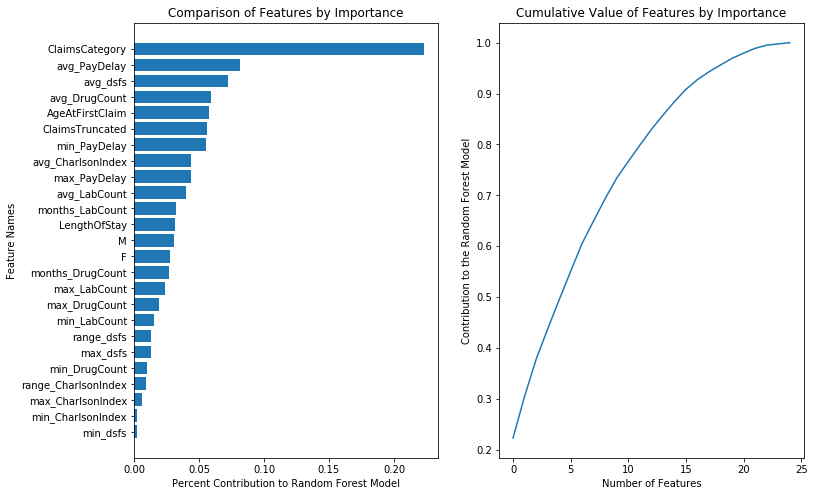

In [101]:
# pair most important features with corresponding feature labels and sort by importance 
z = list(zip(best_rfr.feature_importances_,df_attribs))
z.sort()

# plot horizontal bar by feature importance
values, labels = zip(*z)
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.barh(labels, values)
plt.xlabel('Percent Contribution to Random Forest Model')
plt.ylabel('Feature Names')
plt.title('Comparison of Features by Importance')

# reverse sorting (for a more intuitive aesthetic) and plot the cumulative value of features
plt.subplot(122)
z.sort(reverse=True)
values, labels = zip(*z)
plt.plot(np.cumsum(values))
plt.ylabel('Contribution to the Random Forest Model')
plt.xlabel('Number of Features')
plt.title('Cumulative Value of Features by Importance');

In [102]:
z.sort(reverse=True)
values, labels = zip(*z)
for n in range(5,25,5):
    print('The top {} ({}%) features account for {}% of the predictive value.' \
    .format(n, round((n/X_train.shape[1])*100,1), round((np.cumsum(values[:n])[n-1])*100,1)))

The top 5 (20.0%) features account for 49.4% of the predictive value.
The top 10 (40.0%) features account for 73.4% of the predictive value.
The top 15 (60.0%) features account for 88.4% of the predictive value.
The top 20 (80.0%) features account for 96.9% of the predictive value.


Our "new" features, LengthOfStay and ClaimsCategory, both landed in the top 50% of our best model's most important features.  We may want to explore ways to express our other aggregate features, since the min/max/range features are generally adding less value. The top 15 features (out of 26) account for almost 90% of the predictive value.

### Use PCA to develop further insight into feature importance and feature selection.|

In [96]:
from sklearn.decomposition import PCA

In [97]:
# X_train is already scaled (part of the full pipeline)
X_train_pca = PCA().fit(X_train)

A look at the loadings may give us a sense of which features contributed to each principal component.  Interestingly, our "new" features,  Length of Stay and Claims Category, are among the top factorz in the first principal component.

In [98]:
n_components = []
for n in range(len(X_train_pca.components_[0])):
    n_components.append('c'+str(n+1))

# index is columns - 1 because we removed "labels" in the full pipeline
pca_loadings = pd.DataFrame(X_train_pca.components_.T, index=df_attribs, columns=n_components)
print('\nLoadings for the top 10 principal components')
pca_loadings.iloc[:,:10]


Loadings for the top 10 principal components


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
ClaimsTruncated,0.178537,-0.014162,0.065458,-0.007893,0.033510,0.565580,0.063943,0.023475,-0.070551,0.084722
AgeAtFirstClaim,0.232711,0.087356,-0.030754,0.011083,0.005168,-0.078630,-0.035298,-0.000893,0.005242,-0.306412
max_PayDelay,0.177519,-0.112737,0.125653,0.494722,-0.103682,-0.059077,-0.013499,-0.033759,0.041018,0.034216
min_PayDelay,-0.159578,-0.040340,0.373707,0.359101,-0.008848,0.054731,0.079220,0.037447,-0.090089,-0.042290
avg_PayDelay,-0.023326,-0.103111,0.347342,0.590022,-0.079142,-0.058517,0.032117,0.009955,0.000249,0.011004
LengthOfStay,0.039235,-0.019909,0.024807,0.029083,0.043554,0.125140,-0.151266,-0.828051,0.496278,-0.072950
max_dsfs,0.302589,-0.179115,-0.287718,0.118562,-0.122177,-0.132254,0.049925,0.012597,0.025136,0.123934
min_dsfs,0.024058,0.006947,0.010831,0.001963,0.009395,0.262454,0.374490,0.430632,0.756808,-0.041785
avg_dsfs,0.272900,-0.179268,-0.292886,0.109251,-0.125556,-0.139808,0.071332,0.041059,0.052927,0.160804
max_CharlsonIndex,0.294351,0.086530,0.151065,-0.005063,0.426622,-0.081874,-0.174062,0.093283,0.045687,0.039943


We can also see that some of the loadings tend to move together (e.g, max_dsfs & avg_dsfs, max_Charlson & avg_Charlson).  Can we use this information to improve our feature set?

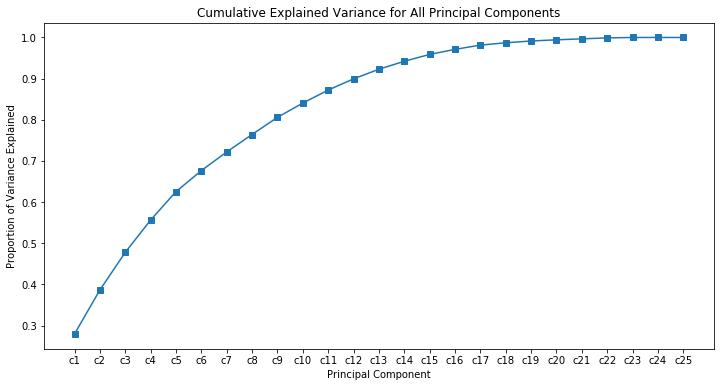

In [99]:
# apply PCA transformation and calculate explained variance
pca = X_train_pca.transform(X_train)
pca_ratio = X_train_pca.explained_variance_ratio_

# Plot explained varience
plt.figure(figsize=(12,6))
plt.plot(n_components, np.cumsum(pca_ratio), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.title('Cumulative Explained Variance for All Principal Components');

In [100]:
for n in range(5,25,5):
    print('The top {} ({}%) principal components account for {}% of explained variance.' \
    .format(n, round((n/X_train.shape[1])*100,1), round((np.cumsum(pca_ratio[:n])[n-1])*100,1)))

The top 5 (20.0%) principal components account for 62.5% of explained variance.
The top 10 (40.0%) principal components account for 84.1% of explained variance.
The top 15 (60.0%) principal components account for 95.9% of explained variance.
The top 20 (80.0%) principal components account for 99.4% of explained variance.


Our top 20 features account for nearly all of the explained variance in the dataset.  These results suggest a better approach to simplifying our model than taking the top features identified by our Random Forest model.  

## Extend pipeline using Principal Components with a Gradient Boosted Regressor
We will try to extend our success with a Random Forest model by using a variant of gradient boosting trees known as XGBoost.
There are a number of different parameter options available. (https://github.com/dmlc/xgboost/blob/master/doc/parameter.md).  We'll explore just a few.

In [115]:
from xgboost import XGBRegressor
from tempfile import mkdtemp
from shutil import rmtree

cachedir = mkdtemp()
pca_pipeline = Pipeline([('PCA', PCA(n_components=20, )),
                         ('XGB', XGBRegressor())], memory=cachedir)

regressors = [('XGBoost (PCA and Best RS)', pca_pipeline)]

params = {'XGB__learning_rate': list(np.arange(0.01,0.2,.05)),
          'XGB__max_depth': list(range(4,10)),
          'XGB__reg_lambda': list(range(1,10)),
          'XGB__reg_alpha': list(range(1, 10))}

for idx, (name, regressor) in enumerate(regressors):
    start = time()
    model = regressor
    rs2 = RandomizedSearchCV(regressor, params, n_iter=10, scoring='neg_mean_squared_error', cv=3, verbose=2)
    rs2.fit(X_train, y_train)
    model = rs2.best_estimator_
    cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-cv_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    model.fit(X_train, y_train)
    test_preds = model.predict(X_val)
    test_score = np.sqrt(mean_squared_error(y_val, test_preds))
    test_time = np.round(time()-start,3)
    
    p_value = ttest(baseline_scores, cv_scores)
    results.loc[len(results)] = [name, round(train_score, 4), round(test_score, 4), round(p_value, 4), 
                                 train_time, test_time, rs2.best_params_]
    
rmtree(cachedir)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] XGB__reg_lambda=1, XGB__reg_alpha=9, XGB__max_depth=8, XGB__learning_rate=0.01 
[CV]  XGB__reg_lambda=1, XGB__reg_alpha=9, XGB__max_depth=8, XGB__learning_rate=0.01, total=  28.3s
[CV] XGB__reg_lambda=1, XGB__reg_alpha=9, XGB__max_depth=8, XGB__learning_rate=0.01 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.7s remaining:    0.0s


[CV]  XGB__reg_lambda=1, XGB__reg_alpha=9, XGB__max_depth=8, XGB__learning_rate=0.01, total=  28.8s
[CV] XGB__reg_lambda=1, XGB__reg_alpha=9, XGB__max_depth=8, XGB__learning_rate=0.01 
[CV]  XGB__reg_lambda=1, XGB__reg_alpha=9, XGB__max_depth=8, XGB__learning_rate=0.01, total=  26.6s
[CV] XGB__reg_lambda=5, XGB__reg_alpha=1, XGB__max_depth=4, XGB__learning_rate=0.01 
[CV]  XGB__reg_lambda=5, XGB__reg_alpha=1, XGB__max_depth=4, XGB__learning_rate=0.01, total=  13.1s
[CV] XGB__reg_lambda=5, XGB__reg_alpha=1, XGB__max_depth=4, XGB__learning_rate=0.01 
[CV]  XGB__reg_lambda=5, XGB__reg_alpha=1, XGB__max_depth=4, XGB__learning_rate=0.01, total=  12.4s
[CV] XGB__reg_lambda=5, XGB__reg_alpha=1, XGB__max_depth=4, XGB__learning_rate=0.01 
[CV]  XGB__reg_lambda=5, XGB__reg_alpha=1, XGB__max_depth=4, XGB__learning_rate=0.01, total=  12.5s
[CV] XGB__reg_lambda=8, XGB__reg_alpha=4, XGB__max_depth=7, XGB__learning_rate=0.16000000000000003 
[CV]  XGB__reg_lambda=8, XGB__reg_alpha=4, XGB__max_depth=7,

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 10.5min finished


The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-154.19, 0.00000)
Machine learning pipeline B is better than A


In [116]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean),0.4823,0.4791,---,0.001,0.000,Predict mean of target values
1,Linear Regression,0.4645,0.4603,0,2.748,0.001,Default parameters
2,LinearRegression,0.4632,0.4595,0,2.692,0.070,Default params with new features
3,RandomForest,0.4941,0.4902,0,123.851,6.217,Default params with new features
4,RandomForest (Best RS),0.4591,0.4542,0,1576.154,70.931,"n_estimator=195, min_samples=6, max_depth=11"
5,XGBoost (PCA and Best RS),0.4604,0.4558,0,1052.989,18.870,"{'XGB__reg_lambda': 2, 'XGB__reg_alpha': 1, 'X..."


In [126]:
print('Best XGBoost was:\n',rs2.best_estimator_)

Best XGBoost was:
 Pipeline(memory='/var/folders/vk/djmkt0rj53b_19y5m34lsbgr0000gn/T/tmph8cnnsz9',
     steps=[('PCA', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('XGB', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.11, max_delta_step=0,
       max_dept...
       reg_alpha=1, reg_lambda=2, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])


## Significance testing for our two best models so far
Every model has demonstrated significance (for better or worse) relative to the baseline model. Remember, we have been evaluating significance relative only to our baseline (Dummy Regressor) up until now.  

Looking at our results table, the XGBoost model with PCA feature reduction appeared slightly less effective compared to the best Random Forest Regressor, but is it a statistically significant difference?  XGBoost reduced our test time by 75% over the Random Forest, which is a nice benefit if we can achieve statistically comprable results. We also used a reduced feature set for the XGBoost model (PCA with n_components=20), so we can also explore using the full feature set or a larger number of PCA components.

In [122]:
# regenerate 30 sample scores using the best Random Forest Regressor
best_rfr = rs.best_estimator_
regressors = [('RandomForest (Best RS)', best_rfr)]

for idx, (name, regressor) in enumerate(regressors):
    start = time()
    cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
    rfr_cv_scores = cross_val_score(regressor, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    rfr_train_score = np.sqrt(-rfr_cv_scores.mean())
    rfr_train_time = np.round(time()-start,3)

    #results.loc[len(results)] = [name, round(train_score, 4), round(test_score, 4), round(p_value, 4), train_time, test_time, 'n_estimator=195, min_samples=6, max_depth=11']

In [123]:
# compare Random Forest (our prior best a/k/a "new baseline") to XGBoost for statistical significance
p_value = ttest(rfr_cv_scores, cv_scores)

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (10.95, 0.00000)
Machine learning pipeline A is better than B


## Phase 1 Analysis
We made progress over our default Linear Regression model through feature engineering and further improved through hyperparamter tunning on a Random Forest Regressor.  Given the latest results (Section 9.6), we can reject the hypothesis that our XGBoost model provided comparable results with significantly less run time, we haven't tried XGBoost (or any other ensemble method) on the full features set yet.  So far, the Random Forest Regressor with 195 trees, max depth of 11 and minimum of 6 samples is our best (predictive) model at the conclusion of Phase 1.  It would be great if we could replicate or improve with a faster algorithm.

## TASKS

* With new insight into the value of certain features, can you think of any better features to add to your preprocessing pipeline (e.g., assign a 'PrimaryConditionGroup' to each member based on some aggregate method, determine whether certain providers are associated with more days in the hospital)? 
* Might there be some value to aggregating existing features in a different way (e.g., changing claims from a numerical variable aggregated by min/max/avg/range to a 3-level categorical seemed to help as did a similar change for Length of Stay).
* Explore other methods for feature selection (e.g., KBest), or try a grid search on PCA to determine if n_components=20 is the best setting.
* Can we improve your model with another round of hyperparameter tuning.  We have to Would a voting ensemble approach improve on our best model(s)?
* Remember that we still have a set of hold-out test data.  Once we're done developing, confirm that your best model(s) perform as expect on the hold-out data.